In [1]:
file_path= r'C:\Users\David Ossi\Downloads\employee_info.csv'


In [2]:
import pandas as pd

df = pd.read_csv(file_path)

In [4]:
df.head()
df

,Name,Age,Salary,Department,Experience
0,Alice,25,50000,HR,2
1,Bob,30,60000,IT,5
2,Charlie,35,75000,Finance,10
3,David,40,90000,IT,15
4,Eva,22,40000,HR,1
5,Frank,29,55000,Marketing,4
6,Grace,33,68000,Finance,8
7,Hannah,27,48000,IT,3
8,Ian,24,45000,Marketing,2
9,Jack,45,100000,Finance,20


In [5]:
df.tail()

,Name,Age,Salary,Department,Experience
5,Frank,29,55000,Marketing,4
6,Grace,33,68000,Finance,8
7,Hannah,27,48000,IT,3
8,Ian,24,45000,Marketing,2
9,Jack,45,100000,Finance,20


In [6]:
# check the shape of the data set

print(f'Dataset Shape: {df.shape}')

Dataset Shape: (10, 5)


In [7]:
print("Column Names:",df.columns)

Column Names: Index(['Name', 'Age', 'Salary', 'Department', 'Experience'], dtype='object')


In [8]:
print(df.describe())

             Age         Salary  Experience
count  10.000000      10.000000   10.000000
mean   31.000000   63100.000000    7.000000
std     7.333333   19963.577947    6.306963
min    22.000000   40000.000000    1.000000
25%    25.500000   48500.000000    2.250000
50%    29.500000   57500.000000    4.500000
75%    34.500000   73250.000000    9.500000
max    45.000000  100000.000000   20.000000


In [9]:

# Filltering and Selcting Data
# Select only IT Department employees
it_employees = df[df['Department'] =='IT']


# Select employess earning more than 60,000
high_salary_employees = df[df['Salary'] > 60000]

# Select specific columns
df_selected = df[['Name', 'Salary','Department']]

# Display result
df_selected.head()



,Name,Salary,Department
0,Alice,50000,HR
1,Bob,60000,IT
2,Charlie,75000,Finance
3,David,90000,IT
4,Eva,40000,HR


In [21]:
# Pivot table - Average salary per department
df_pivot = df.pivot_table(index='Department', values='Salary', aggfunc='mean')

# Crosstab - Count of employees by Department
df_crosstab = pd.crosstab(df['Department'], df['Experience'])

print("Pivot Table:\n", df_pivot)
print("\nCrosstab:\n", df_crosstab)


Pivot Table:
             Salary
Department        
Finance      81000
HR           45000
IT           66000
Marketing    50000

Crosstab:
 Experience  1   2   3   4   5   8   10  15  20
Department                                    
Finance      0   0   0   0   0   1   1   0   1
HR           1   1   0   0   0   0   0   0   0
IT           0   0   1   0   1   0   0   1   0
Marketing    0   1   0   1   0   0   0   0   0


In [17]:
# Create a new column with Salary after 10% increment
df['Updated Salary'] = df['Salary'].apply(lambda x: x * 1.10)

# Apply function row-wise to calculate bonus-to-salary ratio
df['Bonus Ratio'] = df.apply(lambda row: (row['Salary'] * 0.1) / row['Salary'], axis=1)

df.head()


,Name,Age,Salary,Department,Experience,Updated Salary,Bonus Ratio
0,Alice,25,50000,HR,2,55000.0,0.1
1,Bob,30,60000,IT,5,66000.0,0.1
2,Charlie,35,75000,Finance,10,82500.0,0.1
3,David,40,90000,IT,15,99000.0,0.1
4,Eva,22,40000,HR,1,44000.0,0.1


In [18]:
# Get average salary by department
avg_salary_by_department = df.groupby('Department')['Salary'].mean()

# Get total experience by department
total_experience_by_department = df.groupby('Department')['Experience'].sum()

# Display results
print("Average Salary by Department:\n", avg_salary_by_department)
print("\nTotal Experience by Department:\n", total_experience_by_department)


Average Salary by Department:
 Department
Finance      81000.0
HR           45000.0
IT           66000.0
Marketing    50000.0
Name: Salary, dtype: float64

Total Experience by Department:
 Department
Finance      38
HR            3
IT           23
Marketing     6
Name: Experience, dtype: int64


In [20]:
# Create another DataFrame for merging
bonus_data = pd.DataFrame({
    'Department': ['HR', 'IT', 'Finance', 'Marketing'],
    'Bonus': [5000, 7000, 8000, 6000]
})

# Merge with original DataFrame
df_merged = pd.merge(df, bonus_data, on='Department', how='left')

df_merged.head()
df_merged


,Name,Age,Salary,Department,Experience,Updated Salary,Bonus Ratio,Bonus
0,Alice,25,50000,HR,2,55000.0,0.1,5000
1,Bob,30,60000,IT,5,66000.0,0.1,7000
2,Charlie,35,75000,Finance,10,82500.0,0.1,8000
3,David,40,90000,IT,15,99000.0,0.1,7000
4,Eva,22,40000,HR,1,44000.0,0.1,5000
5,Frank,29,55000,Marketing,4,60500.0,0.1,6000
6,Grace,33,68000,Finance,8,74800.0,0.1,8000
7,Hannah,27,48000,IT,3,52800.0,0.1,7000
8,Ian,24,45000,Marketing,2,49500.0,0.1,6000
9,Jack,45,100000,Finance,20,110000.0,0.1,8000


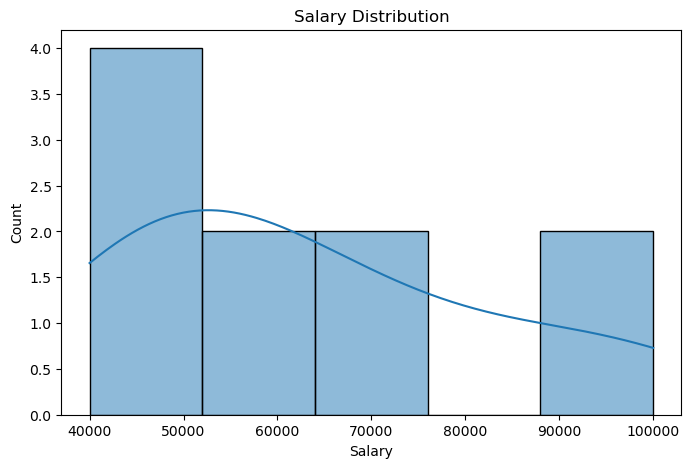

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Salaries
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=5, kde=True)
plt.title("Salary Distribution")
plt.show()

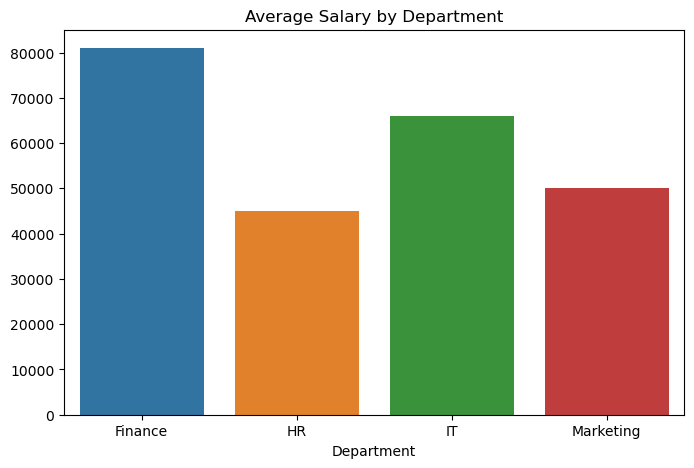

In [24]:
# Bar plot - Average Salary by Department
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_by_department.index, y=avg_salary_by_department.values)
plt.title("Average Salary by Department")
plt.show()

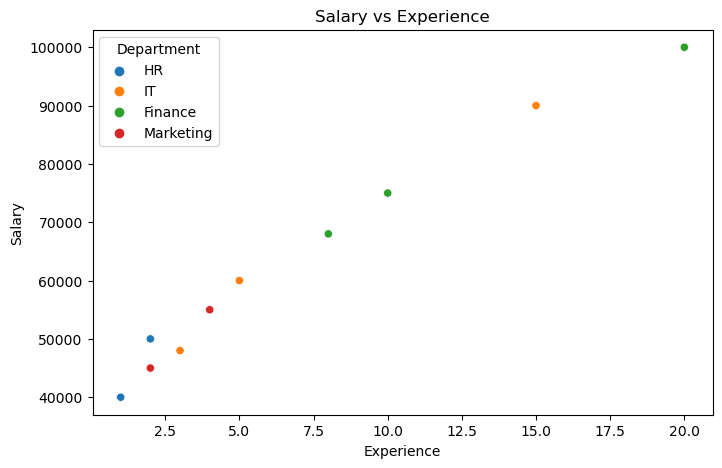

In [25]:
# Scatter plot - Salary vs Experience
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Experience', y='Salary', data=df, hue='Department')
plt.title("Salary vs Experience")
plt.show()

In [27]:
#Statistical Analysis
from scipy import stats


# T-test (Comparing Salaries of IT and Finance Departments)
it_salaries = df[df['Department'] == 'IT']['Salary']
finance_salaries = df[df['Department'] == 'Finance']['Salary']
t_stat, p_value = stats.ttest_ind(it_salaries, finance_salaries)

print(f"T-Test Results: T-Statistic = {t_stat}, P-Value = {p_value}")


T-Test Results: T-Statistic = -0.9480514742721027, P-Value = 0.3967868549933806


In [29]:
#Correlation Matrix

# Ensure correlation uses only numeric columns
print('Correlation Matrix:\n', df.select_dtypes(include=['number']).corr())

# Convert Salary to numeric 
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Extract salaries for t-test
it_salaries = df[df['Department'] == 'IT']['Salary'].dropna()
finance_salaries = df[df['Department'] == 'Finance']['Salary'].dropna()

Correlation Matrix:
                      Age    Salary  Experience  Updated Salary  Bonus Ratio
Age             1.000000  0.993476    0.987365        0.993476          NaN
Salary          0.993476  1.000000    0.989246        1.000000          NaN
Experience      0.987365  0.989246    1.000000        0.989246          NaN
Updated Salary  0.993476  1.000000    0.989246        1.000000          NaN
Bonus Ratio          NaN       NaN         NaN             NaN          NaN
